<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/MX_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_MX = pd.read_csv('../datasets/MX_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_MX = youtube_data_MX.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_MX.columns:
    youtube_data_clean_MX['description'] = youtube_data_clean_MX['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_MX.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_MX.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_MX[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_MX.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_MX.head(3))

# This clean dataframe (youtube_data_clean_BR) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268528, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11T18:03:06Z,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12T00:00:00Z,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11T19:57:02Z,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12T00:00:00Z,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_MX.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_MX.columns:
    print(f"{col}: {youtube_data_MX[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 32442 unique values
title: 33275 unique values
publishedAt: 31964 unique values
channelId: 5065 unique values
channelTitle: 5264 unique values
categoryId: 15 unique values
trending_date: 1322 unique values
tags: 23544 unique values
view_count: 254562 unique values
likes: 142040 unique values
dislikes: 12999 unique values
comment_count: 35248 unique values
thumbnail_link: 32442 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 30572 unique values


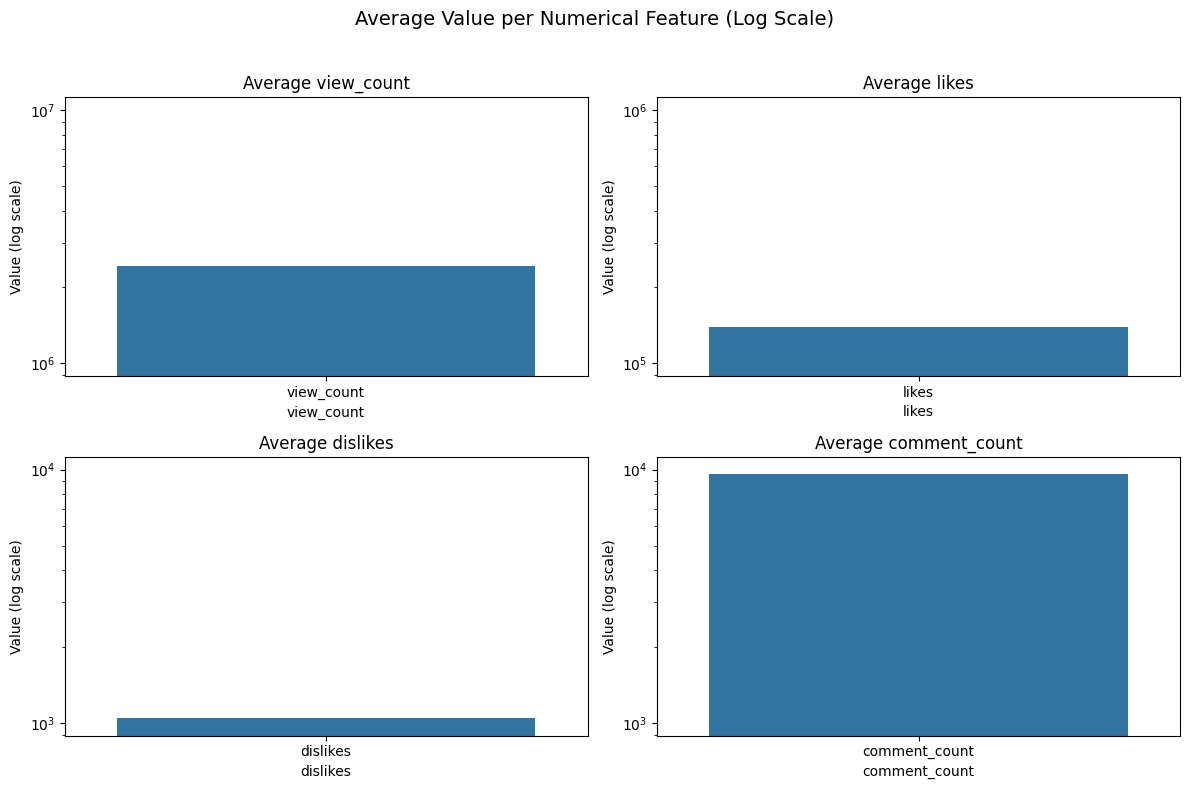

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_MX[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

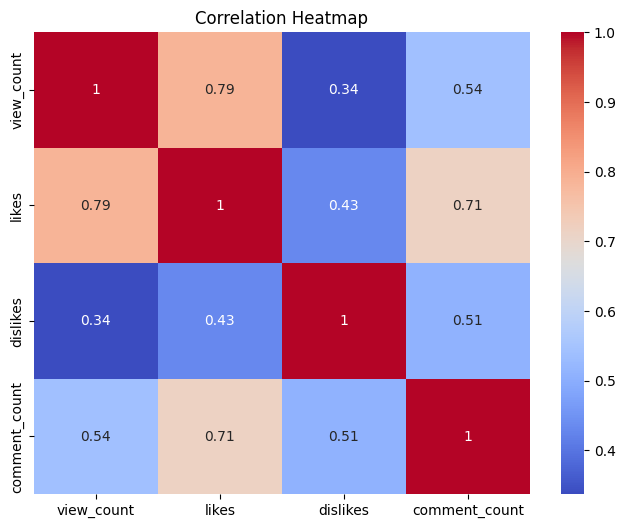

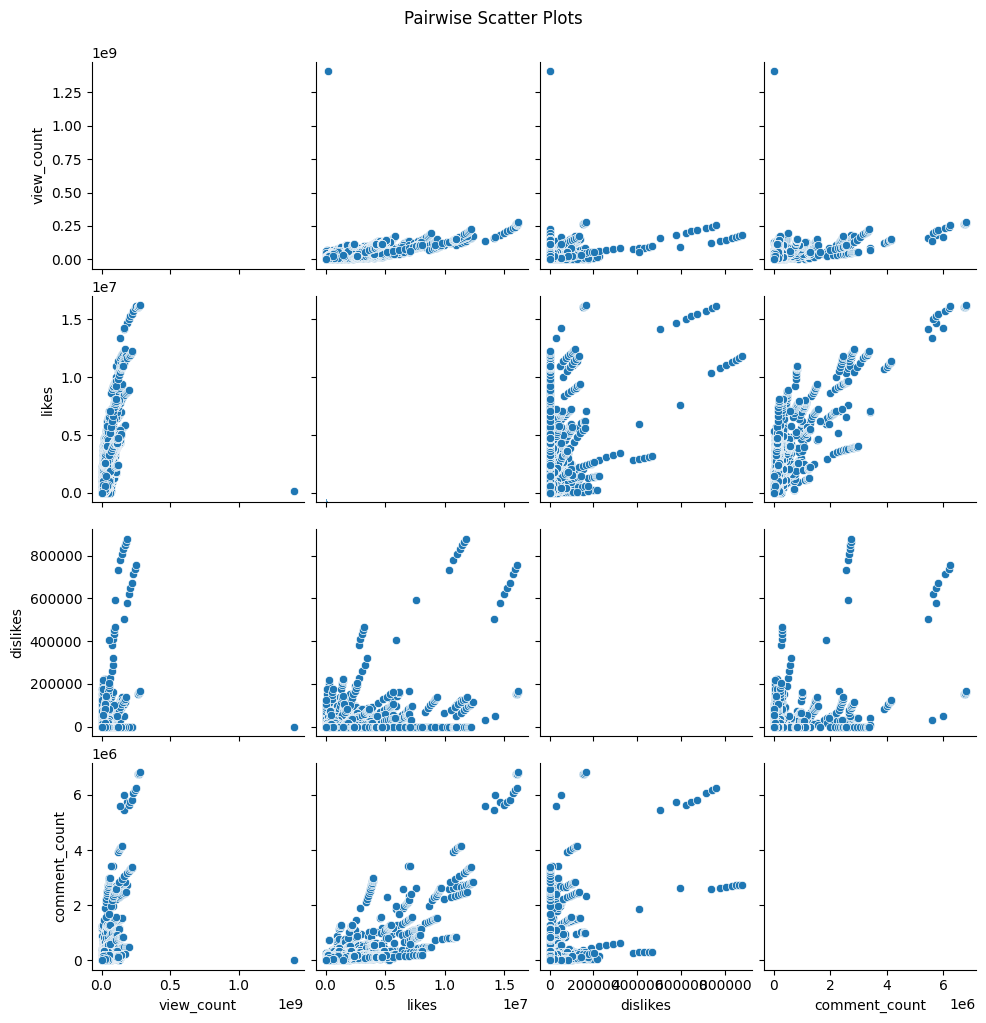

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_MX[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_MX[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


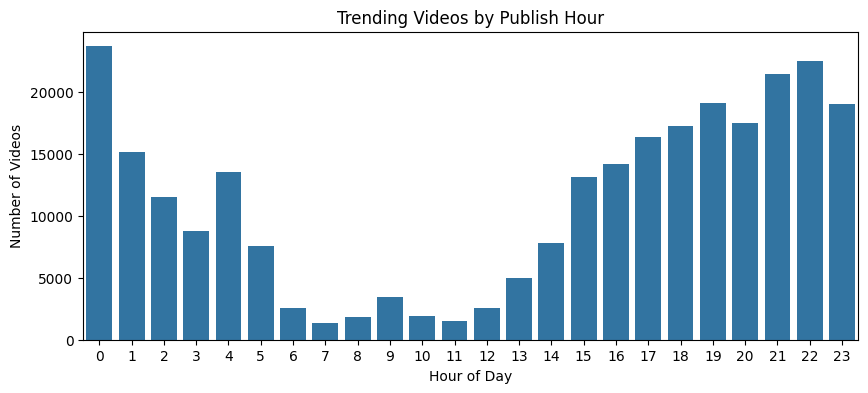

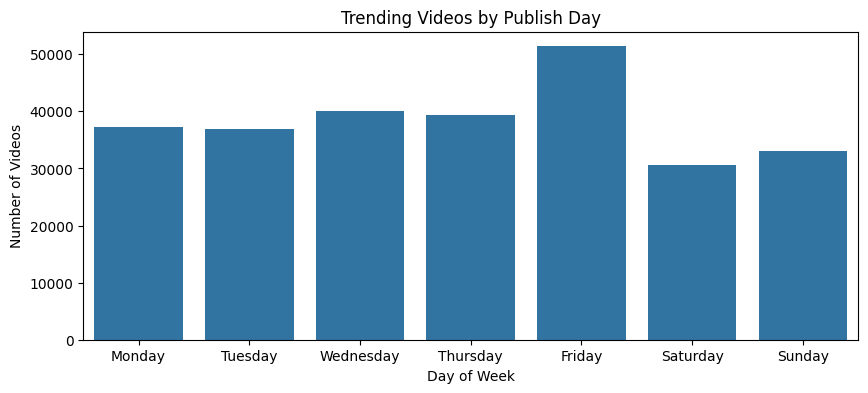

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_MX.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_MX.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_MX[datetime_col].dtype, np.datetime64):
    youtube_data_MX[datetime_col] = pd.to_datetime(youtube_data_MX[datetime_col])

# Extract hour and day of week
youtube_data_MX['publish_hour'] = youtube_data_MX[datetime_col].dt.hour
youtube_data_MX['publish_day'] = youtube_data_MX[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_MX)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_MX, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


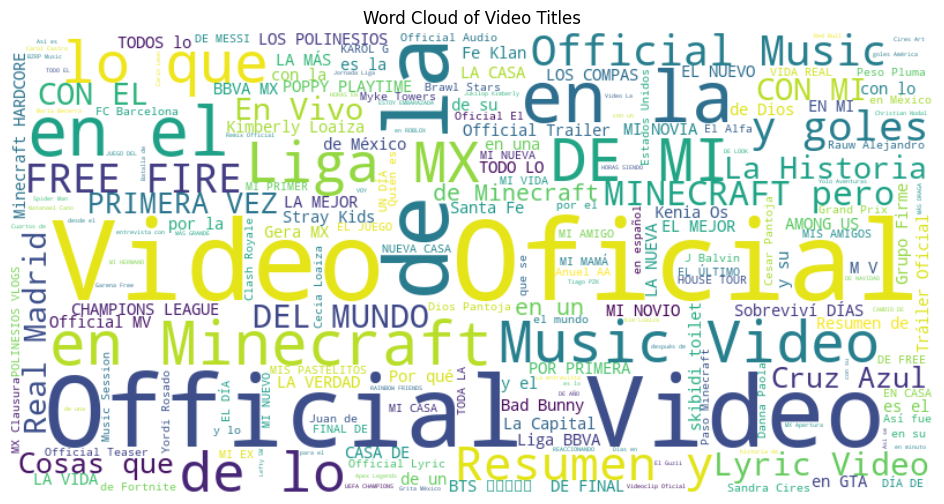

Most common tags:
mexico (Mexico): 6992
comedia (comedy): 5580
reto (challenge): 5298
entretenimiento (entertainment): 5130
challenge: 4897
Latin: 4633
bromas (pranks): 4609
de (of/from): 4406
minecraft (Minecraft): 4394
vlog: 4336


In [10]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_MX['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
# Portuguese-to-English translation dictionary
tag_translation_br = {
    'mexico': 'Mexico',
    'comedia': 'comedy',
    'reto': 'challenge',
    'entretenimiento': 'entertainment',
    'bromas': 'pranks',
    'de': 'of/from',
    'minecraft': 'Minecraft'
}

all_tags = ','.join(youtube_data_MX['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    translated = tag_translation_br.get(tag, tag)
    if tag != translated:
        print(f'{tag} ({translated}): {count}')
    else:
        print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [11]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate Spanish->English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_MX[col].quantile(0.25)
    q3 = youtube_data_MX[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_MX[(youtube_data_MX[col] < lower) | (youtube_data_MX[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: Discord Loot Boxes are here.
  Translated: Discord Loot Boxes are here.
  Channel: Discord | view_count: 1406329649
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 278080610
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 274715791

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16213758
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16165348
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 16115288

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Channel: BLACKPINK | 

# Summary and Insights
Based on the EDA performed on the MX (Mexican) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains over 268,000 trending video records from Mexico, with comprehensive metadata such as views, likes, tags, and timestamps.
- Duplicate entries were removed and no missing values were found in the core numerical fields, resulting in a clean dataset ideal for modeling.
- The dataset includes columns like title, tags, channelTitle, view_count, likes, dislikes, comment_count, and timestamps like publishedAt and trending_date.

**2. Feature Understanding:**
- Quantitative features include: view_count, likes, dislikes, and comment_count.
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date supported daily and hourly pattern analysis.
- The tags and titles were especially useful in understanding the types of content that trend in Mexico.

**3. Univariate Analysis:**
- All numerical engagement metrics show strong right-skewness, with only a few videos reaching extremely high view or like counts.
- Categories like Music, Entertainment, and Comedy are dominant, indicating audience preference for mainstream content.
- The average values for views and likes are noticeably lower than global averages, but comment counts are proportionally high—suggesting active viewer interaction.

**4. Bivariate/Multivariate Analysis:**
- Likes and views exhibit a strong correlation (~0.79), validating likes as an early engagement signal.
- Comment count also has a moderately strong correlation with both views and likes.
- Dislikes had a weaker relationship to popularity, but showed stronger correlation in MX than in some other regions (e.g., DE or BR).
- Scatterplots suggested nonlinear trends and viral thresholds, especially for extreme values in views or likes.

**5. Temporal Analysis:**
- The most common publish hours for trending content were late at night (22:00–23:00) and early morning (00:00–03:00), showing that viewers in Mexico engage during both late night and early morning hours.
- Fridays had the highest number of uploads that went trending, while weekends saw slightly fewer uploads, contrasting with weekday consistency seen in other countries.
- These patterns suggest creators may be timing uploads for maximum exposure ahead of weekend viewership.

**6. Text Analysis:**
- Most common tags in Brazilian trending content included:
    mexico, comedia (comedy), reto (challenge), entretenimiento (entertainment), bromas (pranks), vlog, minecraft
- These highlight a strong cultural preference for humorous, relatable, and interactive content.
- The word cloud of video titles also emphasized terms like “video oficial,” “en vivo,” “resumen,” and “musica,” reflecting the dominance of music videos, livestreams, and sports highlights.

**7. Outlier Detection (w/ Translation):**
- View count outliers included:
    Global viral content such as Discord Loot Boxes, and K-pop videos by BTS like Butter.
- Likes peaked for BTS’s Butter and Dynamite, showing strong K-pop influence in Mexican YouTube trends.
- Most commented videos included football finales and major celebrity content, confirming high user engagement in both sports and entertainment domains.

**Next Steps:**
- Proceed with regression modeling (e.g., Random Forest, XGBoost) using likes, comments, and dislikes to predict view count.
- Define a binary classification label (e.g., top 10% by views) to train models for trend prediction.
- Compare model feature importances to other countries (e.g., US, BR, KR) to identify cultural vs. universal performance signals.
- Consider text-based feature engineering (e.g., NLP on title or tags) to improve future models.

In [12]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_MX[features]
y = youtube_data_MX[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 50558660383406.93
R^2 Score: 0.42427042825352324


Linear Regression:
MSE: 1.155820942630386
R^2: 0.29434859988333373


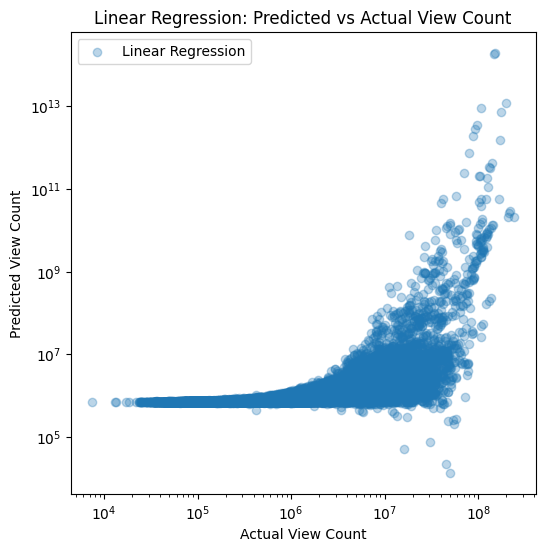

In [13]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_MX from previous cleaning step)
youtube_data_clean_MX['log_view_count'] = np.log1p(youtube_data_clean_MX['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_MX[features]
y = youtube_data_clean_MX['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.972


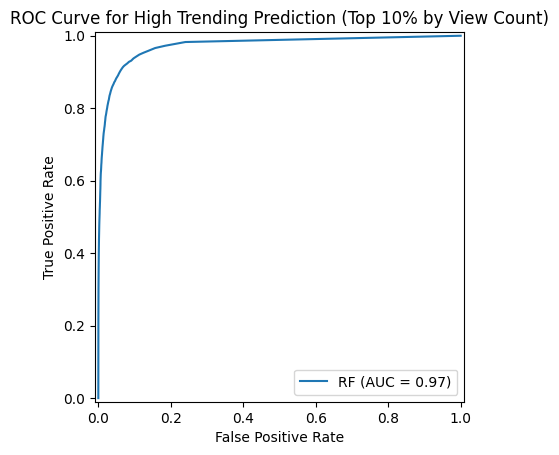

In [14]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_MX['view_count'].quantile(quantile_cut)
youtube_data_clean_MX['high_trending'] = (youtube_data_clean_MX['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_MX[features_cls]
y_cls = youtube_data_clean_MX['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.4280195718922633
R^2: 0.7386856397533739


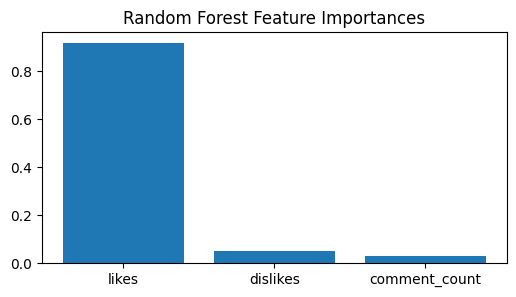

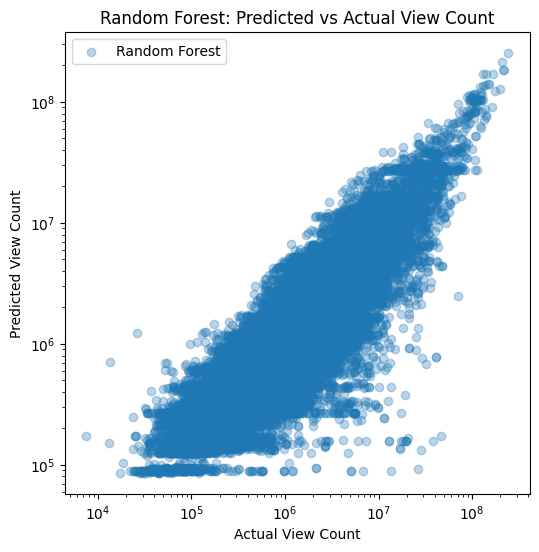

In [15]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

XGBoost Regression:
MSE: 0.42745178884176915
R^2: 0.739032282463993


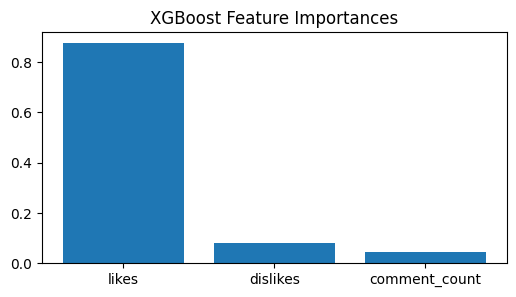

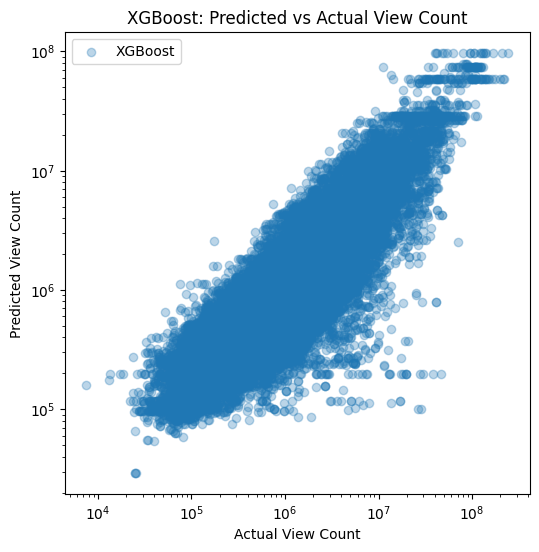

In [16]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [17]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 97.24%


Naive Bayes ROC-AUC: 0.927 (92.69%)


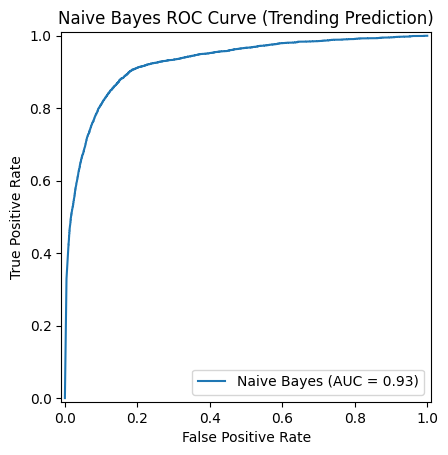

In [18]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_MX.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_MX['view_count'].quantile(quantile_cut)
    youtube_data_clean_MX['high_trending'] = (youtube_data_clean_MX['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_MX[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_MX['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [19]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_MX[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  2.241843
1       dislikes  1.394481
2  comment_count  2.305848
3     categoryId  1.101246


,Feature,VIF,Interpretation
0,likes,2.241843,No concerning collinearity.
1,dislikes,1.394481,No concerning collinearity.
2,comment_count,2.305848,No concerning collinearity.
3,categoryId,1.101246,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- The standardized preprocessing pipeline included duplicate removal, missing value validation, and data type normalization across all features.
- The cleaned dataset (youtube_data_clean_MX) was used throughout the modeling workflow without inconsistencies or loss of records.
- Feature columns used for modeling: likes, dislikes, comment_count, categoryId (for classification only), and view_count.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: `view_count` (original scale, no log transform used in final model)
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression (Raw Scale):**
        - *MSE*: ~5.06 × 10¹³
        - *R²*: 0.424
    - **Linear Regression (Log-Transformed):**
        - *MSE*: 1.156
        - *R²*: 0.294
    - **Random Forest Regressor (log-transformed target):**
        - *MSE*: 0.428
        - *R²*: 0.739
    - **XGBoost Regressor (log-transformed target):**
        - *MSE*: 0.427
        - *R²*: 0.739
- **Best Performer (Regression):** XGBoost slightly outperformed Random Forest on MSE while matching it on R². Both tree-based models provided significant improvements over linear methods, supporting the presence of nonlinear relationships in the engagement-to-views mapping.
- **Interpretability:** Likes remained the most informative variable, with minimal contributions from dislikes and comment_count. This matches feature patterns observed in the US, KR, IN, and JP datasets.

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: `high_tending` = top 10% of view conts within the DE dataset.
- **Features**: `likes`, `dislikes`, `comment_count`, and `categoryId`.
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 97.24%
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 92.69%
- **Best Performer (Classification):** Random Forest once again delivered the strongest classification performance, with near-perfect ROC-AUC and excellent separation between high- and low-trending content.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** All variance inflation factors were comfortably below the standard multicollinearity threshold:
    -   likes (2.24), dislikes (1.39), comment_count(2.31), categoryId (1.10)
- **Interpretation:** All VIF values were within acceptable limits (<5), indicating no significant multicollinearity concerns and supporting the use of these features in regression and classification models.

### 5. **Model/Output Interpretability**
- **Feature Importance:** Likes dominated feature importances in both Random Forest and XGBoost. Dislikes and comment_count made minor but consistent contributions. CategoryId had low impact in classification.
- **Visual Diagnostics:** Predicted vs. actual plots for Random Forest and XGBoost showed strong alignment, especially for videos within mid-to-high view count ranges. Linear regression showed wide variance and over-prediction on outliers. ROC curves for Random Forest classifiers displayed strong TPR-FPR separation, confirming reliability for high-trending video detection.
- **Outlier Translation:** Top view/like outliers included BTS’s “Butter” and BLACKPINK’s “Ice Cream” — global K-pop hits that trended across multiple countries.
- Top disliked videos were again led by BLACKPINK's collaboration videos — often subject to high engagement (both positive and negative).
- Highest comment counts were found on BTS content, reaffirming high fandom participation across MX as in KR, IN, and GB.

### 6. **Business Relevance and Conclusion**
- **Tree-based models** Tree-based models (Random Forest and XGBoost) clearly outperformed linear baselines, validating their use in modeling complex engagement dynamics for Mexico’s YouTube market.
- Likes were once again the most universal early signal for view prediction across global regions — a reliable KPI for digital media analytics teams.
- The pipeline proved robust in the Mexican context, achieving: 97.2% ROC-AUC for classification / R² of 0.739 for regression
- These results affirm that this modeling framework generalizes well across geographies, and can be deployed to support strategic decisions in content targeting, promotion, and trend forecasting for Latin American markets.